ref. https://pandas.pydata.org/docs/getting_started/intro_tutorials/07_reshape_table_layout.html

In [1]:
import pandas as pd

In [2]:

air_quality = pd.read_csv(
    "air_quality_long.csv", index_col="date.utc", parse_dates=True
)

air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [3]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5272 entries, 2019-06-18 06:00:00+00:00 to 2019-04-09 02:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       5272 non-null   object 
 1   country    5272 non-null   object 
 2   location   5272 non-null   object 
 3   parameter  5272 non-null   object 
 4   value      5272 non-null   float64
 5   unit       5272 non-null   object 
dtypes: float64(1), object(5)
memory usage: 288.3+ KB


In [4]:

# list all parameters
air_quality["parameter"].unique()


array(['pm25', 'no2'], dtype=object)

In [5]:

# Filter for NO2
no2 = air_quality[air_quality["parameter"] == "no2"]

no2.info()

no2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3447 entries, 2019-06-21 00:00:00+00:00 to 2019-04-09 02:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       3447 non-null   object 
 1   country    3447 non-null   object 
 2   location   3447 non-null   object 
 3   parameter  3447 non-null   object 
 4   value      3447 non-null   float64
 5   unit       3447 non-null   object 
dtypes: float64(1), object(5)
memory usage: 188.5+ KB


,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


In [6]:

# We focus on NO2 data and only use the first two measurements of each location (i.e. the head of each group). 
# The subset of data will be called no2_subset
no2_subset = no2.sort_index().groupby(["location"]).head(2)


In [7]:

# List all locations
no2_subset["location"].unique()

array(['BETR801', 'FR04014', 'London Westminster'], dtype=object)

In [8]:


no2_subset.info()

no2_subset.head(100)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-04-09 01:00:00+00:00 to 2019-04-09 03:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       6 non-null      object 
 1   country    6 non-null      object 
 2   location   6 non-null      object 
 3   parameter  6 non-null      object 
 4   value      6 non-null      float64
 5   unit       6 non-null      object 
dtypes: float64(1), object(5)
memory usage: 336.0+ bytes


,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [9]:

import matplotlib.pyplot as plt

In [ ]:
# The air_quality_no2_long.csv" data set provides 
# values for the measurement stations FR04014, BETR801
# and London Westminster in respectively Paris, Antwerp and London.


air_quality = pd.read_csv("air_quality_no2_long.csv")

In [12]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [13]:
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [14]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [15]:
air_quality.describe()

,value
count,2068.000000
mean,26.261847
std,13.479451
min,0.000000
25%,17.000000
50%,25.000000
75%,33.000000
max,97.000000


In [17]:
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [18]:

air_quality.dtypes

city          object
country       object
datetime      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [ ]:
# Convert datetime column to datetime
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])

air_quality.dtypes

city                      object
country                   object
datetime     datetime64[ns, UTC]
location                  object
parameter                 object
value                    float64
unit                      object
dtype: object

In [20]:
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [32]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [33]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

<Axes: >

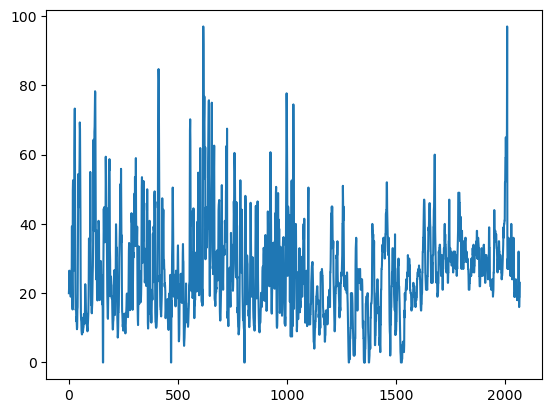

In [54]:
from re import X


air_quality["month"] = air_quality["datetime"].dt.month


air_quality["value"].plot()



In [57]:

# What is the average concentration for each day of the week for each of the measurement locations?

air_quality["day"] = air_quality["datetime"].dt.dayofweek

air_quality.groupby(["location", "day"])["value"].mean().unstack()


day,0,1,2,3,4,5,6
location,,,,,,,
BETR801,27.875000,22.214286,21.125000,27.500000,28.400000,33.500000,21.896552
FR04014,24.856250,30.999359,29.165753,28.600690,31.617986,25.266154,23.274306
London Westminster,23.969697,24.885714,23.460432,24.780142,26.446809,24.977612,24.859155


In [61]:

air_quality["hour"] = air_quality["datetime"].dt.hour

air_quality_hourly = air_quality.groupby(["hour"])["value"].mean()

air_quality_hourly


hour
0     27.955294
1     26.125688
2     23.558511
3     23.242683
4     22.979518
5     27.070732
6     30.635632
7     31.346591
8     29.138636
9     26.071591
10    22.602326
11    21.275294
12    21.029762
13    21.008235
14    21.737647
15    23.840000
16    24.972619
17    26.691667
18    27.089412
19    28.143529
20    29.372941
21    30.973256
22    32.451282
23    31.189412
Name: value, dtype: float64

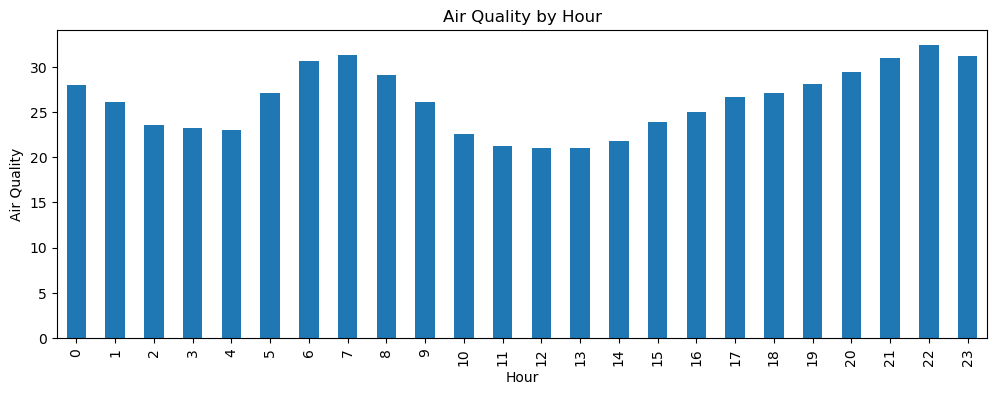

In [63]:

fig, axs = plt.subplots(figsize=(12, 4))

air_quality_hourly.plot(kind="bar", ax=axs)

axs.set_title("Air Quality by Hour")
axs.set_xlabel("Hour")
axs.set_ylabel("Air Quality")

plt.show()



In [69]:

no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

no_2


location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


<Axes: xlabel='datetime'>

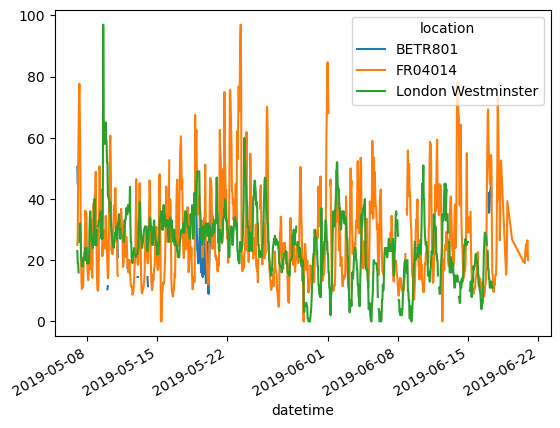

In [70]:
no_2.plot()

In [71]:

no_2.index.year, no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='datetime', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='datetime', length=1033))

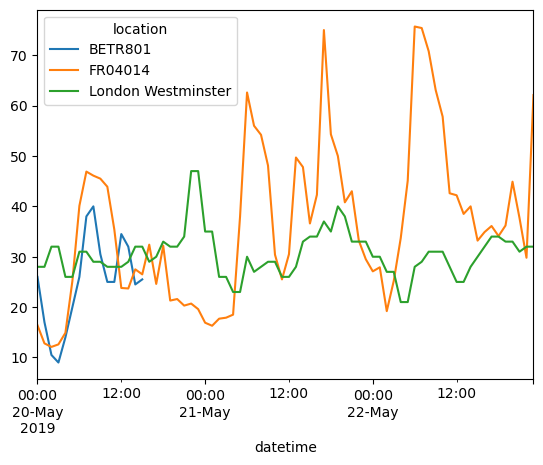

In [73]:

no_2["2019-05-20":"2019-05-22"].plot();